In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
kernels = [
    'linear',
    'oldroyd',
    'poly',
    'cosine',
    'rbf'
]

kernels_filtered = [
    'linear',
    'oldroyd',
    'cosine',
    'rbf'
]


In [3]:

data =  [np.memmap(f'../../npz_data/KPCA_4roll/X_{x}.npz', dtype='float32', mode='r', shape=(36000,20)) for x in kernels]

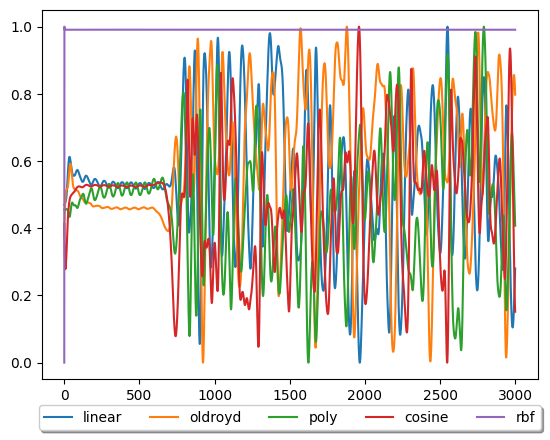

In [4]:
sim = 11
q =15

for i, k in enumerate(kernels):
    plot_data = data[i][sim*3000:(sim+1)*3000,q]

    plot_data = (plot_data - plot_data.min()) / (plot_data.max() - plot_data.min())

    plt.plot(plot_data, label = k)
    # plt.title(k)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),
          fancybox=True, shadow=True, ncol=5)

# plt.yscale('log')

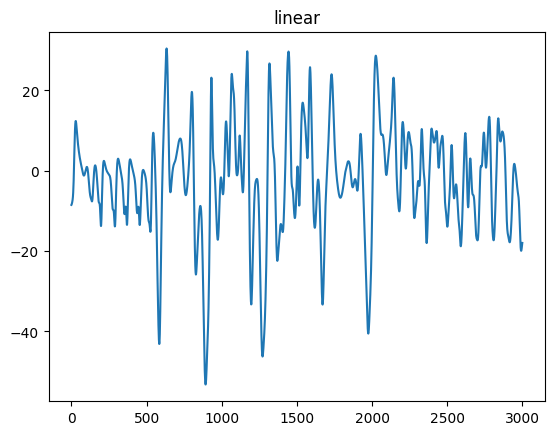

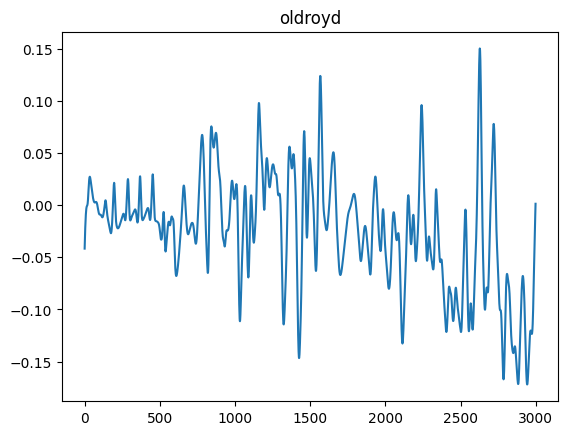

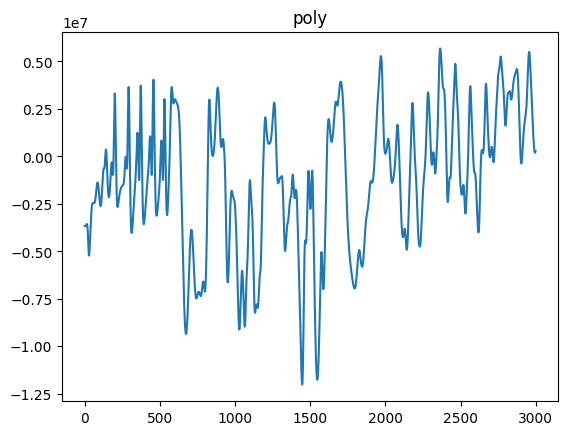

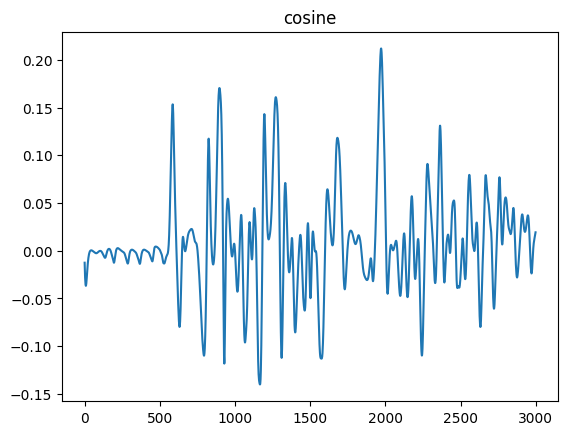

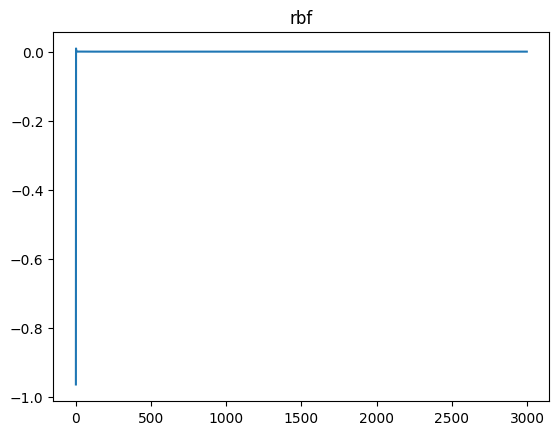

In [5]:
sim = 7
q =15

for i, k in enumerate(kernels):
    plt.figure()
    plot_data = data[i][sim*3000:(sim+1)*3000,q]

    # plot_data = (plot_data - plot_data.min()) / (plot_data.max() - plot_data.min())

    plt.plot(plot_data, label = k)
    plt.title(k)
# plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),
#           fancybox=True, shadow=True, ncol=5)

# plt.yscale('log')

In [6]:
data_U =  [np.load(f'../../npz_data/KPCA_4roll/U_fit_{x}.npz',allow_pickle=True) for x in kernels]

In [7]:
param = np.repeat((1,2,.5), 5).reshape((3,-1)).T
print(param,(1-param[:,2])/(param[:,0] * param[:,1]))
np.sqrt((1-param[:,2])/(param[:,0] * param[:,1])).reshape((-1,1)).shape

[[1.  2.  0.5]
 [1.  2.  0.5]
 [1.  2.  0.5]
 [1.  2.  0.5]
 [1.  2.  0.5]] [0.25 0.25 0.25 0.25 0.25]


(5, 1)

In [8]:
data_U[3]['eigenvalues']

array([ 1.7902719e+03,  9.5444763e+02,  9.1482623e+02, ...,
       -1.0398849e-02, -1.7136948e-02, -5.0457563e-02], dtype=float32)

Text(0.5, 1.0, 'Cummulative Energy')

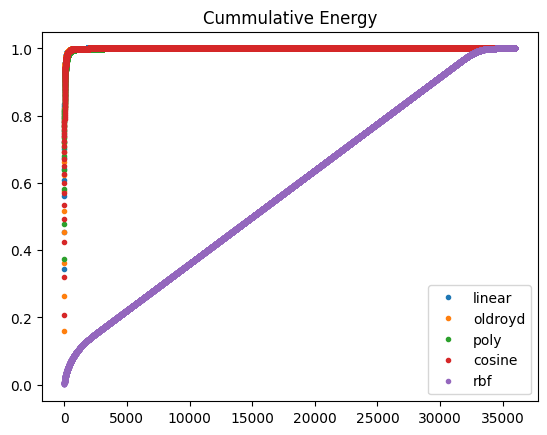

In [9]:
for i, k in enumerate(kernels):
    e = data_U[i]['eigenvalues']
    energy = np.cumsum(e)/e.sum()
    plt.plot(energy,'.' ,label = k)

plt.legend()
plt.title('Cummulative Energy')
# plt.yscale('log')

# Reconstruction Results

In [10]:
results_files = [f'results_Kernel_4RollOSC_Latent_20_energy_False_Kernel_{k}_train' for k in kernels]

In [ ]:
def get_results_kpca(ds, norm = False):
    energy_total = np.zeros(len(kernels))
    mse_total = np.zeros(len(kernels))
    for i,k in enumerate(kernels):
        # if k == 'poly':
        #     continue
        fname = f'Results/results_Kernel_4RollOSC_Latent_20_energy_False_Kernel_{k}_{ds}'
        if norm:
            fname += '_Norm-in'
        fname +='.txt'
        with open(fname, 'r') as f:
            lines = f.readlines()

            energy_err_line = lines[1::3]
            mse_err_line = lines[2::3]

            energy_err = [float(l.split(':')[-1]) for l in energy_err_line]
            mse_err = [float(l.split(':')[-1]) for l in mse_err_line]

            energy_total[i] = np.mean(energy_err)
            mse_total[i] = np.mean(mse_err)

        return energy_total, mse_total


Text(0.5, 0.98, 'MSE Error')

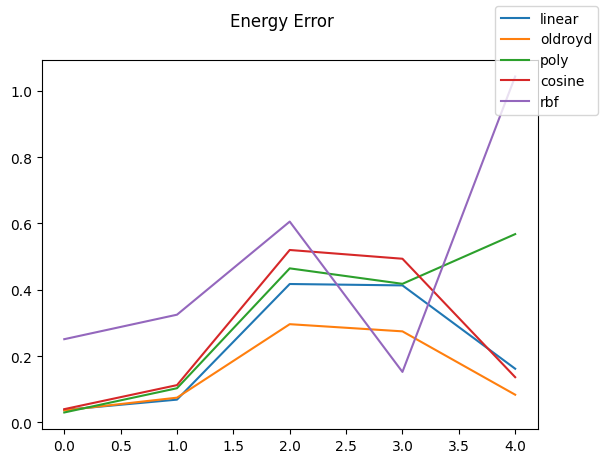

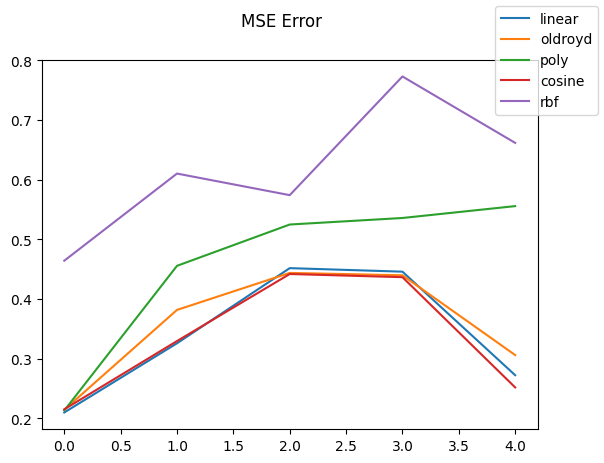

In [23]:
energy_total = np.zeros(len(kernels))
mse_total = np.zeros(len(kernels))
for i,k in enumerate(kernels):
    # if k == 'poly':
    #     continue
    fname = f'Results/results_Kernel_4RollOSC_Latent_20_energy_False_Kernel_{k}_test_Norm-in.txt'
    with open(fname, 'r') as f:
        lines = f.readlines()

        energy_err_line = lines[1::3]
        mse_err_line = lines[2::3]

        energy_err = [float(l.split(':')[-1]) for l in energy_err_line]
        mse_err = [float(l.split(':')[-1]) for l in mse_err_line]
        f1 = plt.figure(0)
        plt.plot(energy_err, label = k)
        f2 = plt.figure(1)
        plt.plot(mse_err, label = k)

        energy_total[i] = np.mean(energy_err)
        mse_total[i] = np.mean(mse_err)
f1.legend()
f2.legend()

f1.suptitle('Energy Error')
f2.suptitle('MSE Error')

Text(0.5, 1.0, 'MSE Error')

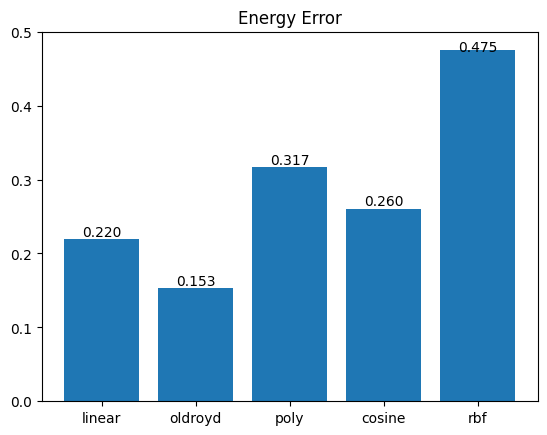

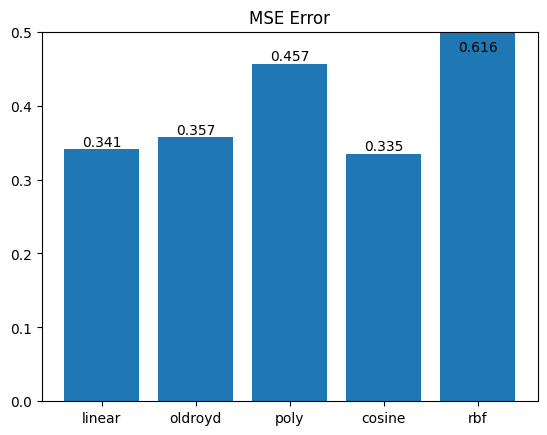

In [24]:

b1 = plt.bar(kernels, energy_total)
plt.ylim([0,.5])
for rect in b1:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width() / 2.0, np.min((height, 0.47)), f'{height:.3f}', ha='center', va='bottom')
    # if height >= .5:
    #     plt.text(rect.get_x() + rect.get_width() / 2.0, .47, f'{height:.3f}', ha='center', va='bottom')
plt.title('Energy Error')


plt.figure()
b1 = plt.bar(kernels, mse_total)
plt.ylim([0,.5])
for rect in b1:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width() / 2.0, np.min((height, 0.47)), f'{height:.3f}', ha='center', va='bottom')
plt.title('MSE Error')


## box plot

In [53]:
kernels_filtered = [
    # 'poly',
    # 'rbf',
    'cosine',
    'linear',
    'oldroyd'
]

energy_total = np.zeros((12, len(kernels_filtered)))
mse_total = np.zeros((12, len(kernels_filtered)))
i = 0
for k in kernels_filtered:
    # if k == 'poly':
    #     continue
    fname = f'Results/results_Kernel_4RollOSC_Latent_20_energy_False_Kernel_{k}_train.txt'
    with open(fname, 'r') as f:
        lines = f.readlines()

        energy_err_line = lines[1::3]
        mse_err_line = lines[2::3]

        energy_err = [float(l.split(':')[-1]) for l in energy_err_line]
        mse_err = [float(l.split(':')[-1]) for l in mse_err_line]
        # f1 = plt.figure(0)
        # plt.plot(energy_err, label = k)
        # f2 = plt.figure(1)
        # plt.plot(mse_err, label = k)

        energy_total[:,i] = energy_err
        mse_total[:,i] = mse_err
        i=i+1

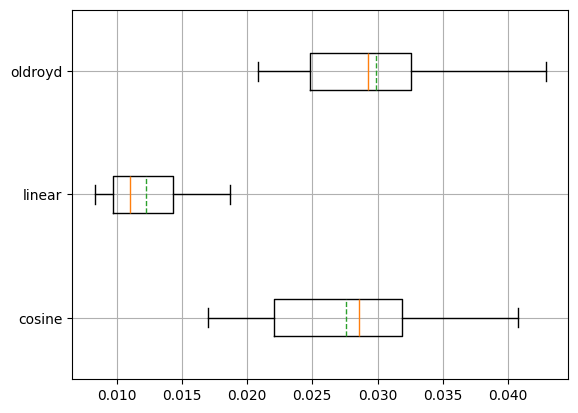

In [55]:
_ = plt.boxplot(energy_total, labels=kernels_filtered, showmeans =True, meanline=True,vert=False, whis = (0,100))
# plt.legend()
plt.grid()